                                       EDA (Exploratory Data Analysis)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import mean, var
from wordcloud import WordCloud
import ast
import warnings
warnings.filterwarnings("ignore")

Cargamos los csv's ya limpios.

In [76]:

df_games = pd.read_csv('../ETL_steam_games.csv',encoding = 'utf-8')
df_reviews = pd.read_csv('../Review_Sentiment_Analysis.csv',encoding = 'utf-8')
df_items = pd.read_csv('../ETL_user_items.csv',encoding = 'utf-8')


In [77]:
def tipo_de_Dato_df(dataframe):
    datos = {"Columna": [], "tipo_de_dato": [], "%_no_nulos": [], "%_nulos": [], "nulos": []}

    for columna in dataframe.columns:
        no_nulos = (dataframe[columna].count() / len(dataframe)) * 100
        datos["Columna"].append(columna)
        datos["tipo_de_dato"].append(dataframe[columna].apply(type).unique())
        datos["%_no_nulos"].append(round(no_nulos, 2))
        datos["%_nulos"].append(round(100-no_nulos, 2))
        datos["nulos"].append(dataframe[columna].isnull().sum())

    df_info = pd.DataFrame(datos)
        
    return df_info

tipo_de_Dato_df(df_games)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,Publisher,"[<class 'str'>, <class 'float'>]",99.95,0.05,5
1,Genres,[<class 'str'>],100.00,0.00,0
2,App_Name,[<class 'str'>],100.00,0.00,0
3,Price,[<class 'float'>],100.00,0.00,0
4,Item_Id,[<class 'int'>],100.00,0.00,0
5,Developer,"[<class 'str'>, <class 'float'>]",99.82,0.18,19
6,Release_Year,[<class 'int'>],100.00,0.00,0


Devolvemos las columnas publisher, developer y gneres a su tipo de dato original para evitar los datos nulos:

In [78]:
df_games['Publisher'] = df_games['Publisher'].astype(str)
df_games['Developer'] = df_games['Developer'].astype(str)
df_games['Genres'] = df_games['Genres'].astype(str)
tipo_de_Dato_df(df_games)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,Publisher,[<class 'str'>],100.0,0.0,0
1,Genres,[<class 'str'>],100.0,0.0,0
2,App_Name,[<class 'str'>],100.0,0.0,0
3,Price,[<class 'float'>],100.0,0.0,0
4,Item_Id,[<class 'int'>],100.0,0.0,0
5,Developer,[<class 'str'>],100.0,0.0,0
6,Release_Year,[<class 'int'>],100.0,0.0,0


In [79]:
tipo_de_Dato_df(df_items)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,Item_Id,[<class 'int'>],100.0,0.0,0
1,Item_Name,[<class 'str'>],100.0,0.0,0
2,Playtime_Forever,[<class 'int'>],100.0,0.0,0
3,User_Id,[<class 'str'>],100.0,0.0,0


In [80]:
tipo_de_Dato_df(df_reviews)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,User_Id,[<class 'str'>],100.0,0.0,0
1,Item_Id,[<class 'int'>],100.0,0.0,0
2,Recommend,[<class 'bool'>],100.0,0.0,0
3,Year_Posted,[<class 'int'>],100.0,0.0,0
4,Sentiment_Analysis,[<class 'int'>],100.0,0.0,0


In [81]:
df_games.columns

Index(['Publisher', 'Genres', 'App_Name', 'Price', 'Item_Id', 'Developer',
       'Release_Year'],
      dtype='object')

Vamos a empezar por una nube de palabras, para conocer que títulos (nombres de juegos) son más frecuentes:

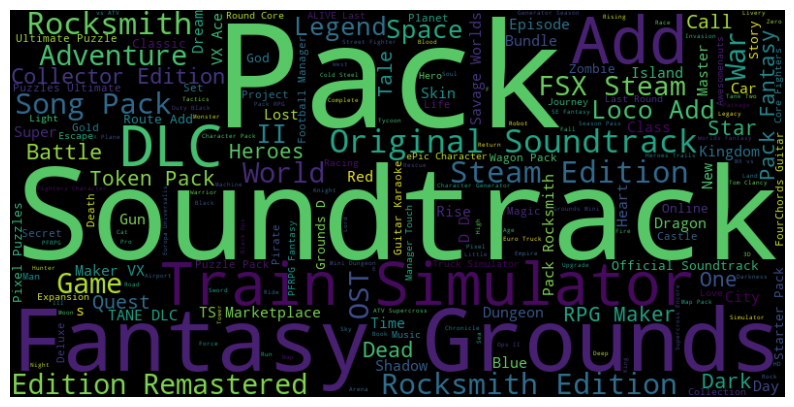

In [82]:
#Se une todas las palabras de la columna 'App_Name' como un str
word = ' '.join(df_games['App_Name'].astype(str))

#se crea un objeto WordCloud con parámetros específicos
wordcloud = WordCloud(width=800, height=400, max_font_size=150, random_state=42).generate(word)

#Configurar el tamaño de la figura de la nube de palabras
plt.figure(figsize=(10, 6))

#Mostrar la nube de palabras utilizando matplotlib
plt.imshow(wordcloud, interpolation='bilinear')

#No mostrar ejes en la visualización
plt.axis('off')

#Mostrar la nube de palabras
plt.show()

                                                                GENRES

Vamos a analizar la columna GENRES, para ver cómo se distribuyen los juegos en los distintos géneros:

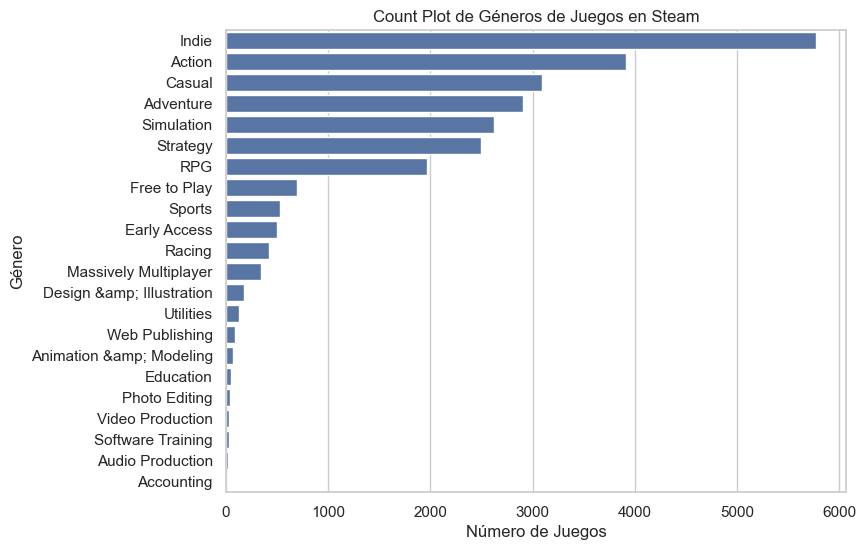

In [83]:
#Se separan los géneros en filas individuales
genres_split = df_games['Genres'].str.split(',')
#Df con los generos separados:
df_genres = pd.DataFrame(genres_split.tolist(), index=df_games.index).stack()
df_genres = df_genres.reset_index(level=1, drop=True).rename('Genre')
df_games_genres = df_games.join(df_genres)

# Crear el count plot.
plt.figure(figsize=(8, 6))
sns.countplot(y='Genre', data=df_games_genres, order=df_games_genres['Genre'].value_counts().index)
plt.title('Count Plot de Géneros de Juegos en Steam')
plt.xlabel('Número de Juegos')
plt.ylabel('Género')
plt.show()

Teniendo en cuenta  el total de juegos, vamos a calcular  el porcentaje que representan los generos mas jugados, qué son Indie,ACtion, Casual, Adventure, Simulation, Strategy y Rpg. 

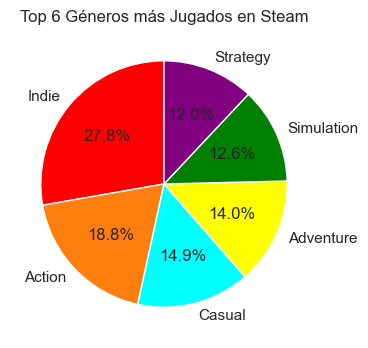

In [84]:
#Se obtiene los cinco géneros más jugados y sus porcentajes
top6_genres = df_games_genres['Genre'].value_counts().nlargest(6)
porcentaje_top6 = (top6_genres / len(df_games_genres)) * 100
sns.set_style("whitegrid")

#Se crea el gráfico de torta
colores = ["red","tab:orange", "cyan", "yellow", "green", "purple"] 
plt.figure(figsize=(4,4))
plt.pie(porcentaje_top6, labels=porcentaje_top6.index, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Top 6 Géneros más Jugados en Steam')
plt.show()

In [85]:
df_items.columns

Index(['Item_Id', 'Item_Name', 'Playtime_Forever', 'User_Id'], dtype='object')

                                                      DEVELOPERS:     
Vamos a ver cuales son los desarroladores que mas lanzamientos han lanzado:

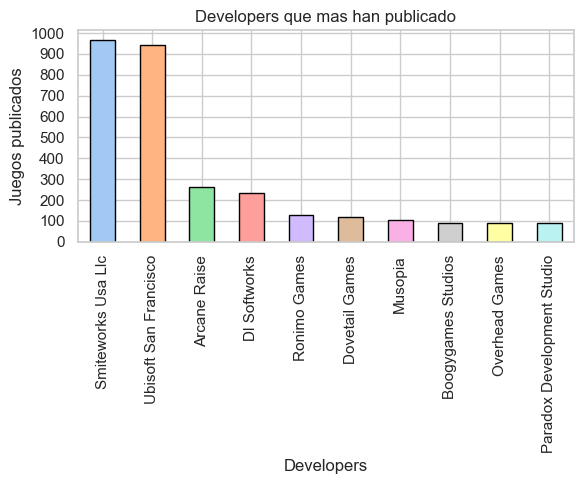

In [86]:

# Contar las categorías más comunes y obtener las 10 primeras
top_developers = df_games_genres['Developer'].value_counts().nlargest(10)

# Crear un gráfico de barras invertido
plt.figure(figsize=(6,5))
top_developers.plot(kind='bar', color=sns.color_palette("pastel", len(top_developers)),edgecolor='black')
plt.xlabel('Developers')
plt.ylabel('Juegos publicados')
plt.title('Developers que mas han publicado')
plt.yticks(range(0, 1001, 100))  

plt.tight_layout()

# Mostrar el gráfico
plt.show()

                                                RELEASE_YEARS
Veremos en qué años hubo mayor cantidad de lanzamientos de juegos:                                                

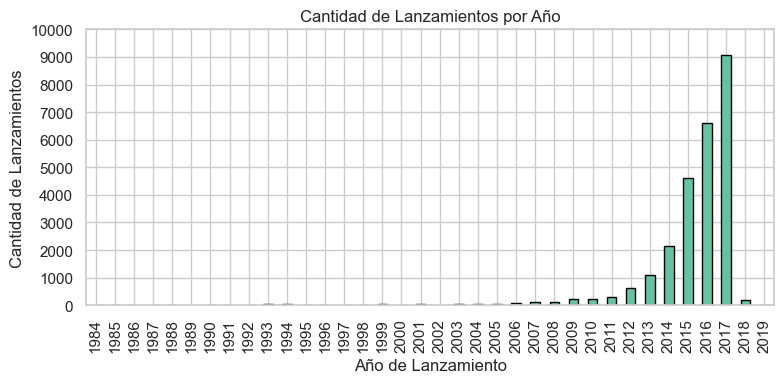

In [87]:
# Contar la cantidad de lanzamientos por año
lanzamientos_por_anio = df_games_genres['Release_Year'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(8, 4))
lanzamientos_por_anio.plot(kind='bar', color='#66c2a5', edgecolor='black')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Lanzamientos')
plt.title('Cantidad de Lanzamientos por Año')
plt.yticks(range(0, 10001, 1000)) 
plt.tight_layout()

# Mostrar el gráfico
plt.show()

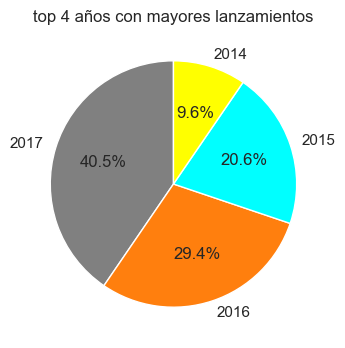

In [88]:
#Se obtienen los 4 géneros más jugados y sus porcentajes
top4_years = df_games_genres['Release_Year'].value_counts().nlargest(4)
porcentaje_years = (top4_years / len(df_games_genres))*100

sns.set_style("whitegrid")
#Se crea el gráfico de torta
colores2 = ["grey","tab:orange", "cyan", "yellow", "green", "purple"] 
plt.figure(figsize=(4,4))
plt.pie(porcentaje_years, labels=porcentaje_years.index, autopct='%1.1f%%', startangle = 90, colors=colores2)
plt.title('top 4 años con mayores lanzamientos')
plt.show()

                                                                PRICE   
                                                                

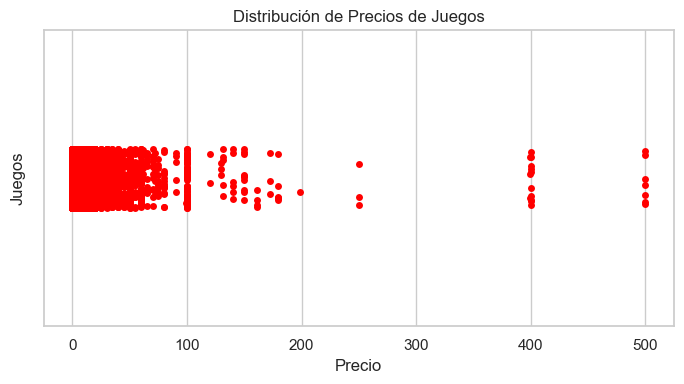

In [89]:
sns.set(style="whitegrid")

#Se crea el strip plot
plt.figure(figsize=(7, 4))
sns.stripplot(x='Price', data=df_games_genres, jitter=True, color='red', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Juegos')
plt.title('Distribución de Precios de Juegos')
plt.tight_layout()

#Se muestra el gráfico
plt.show()

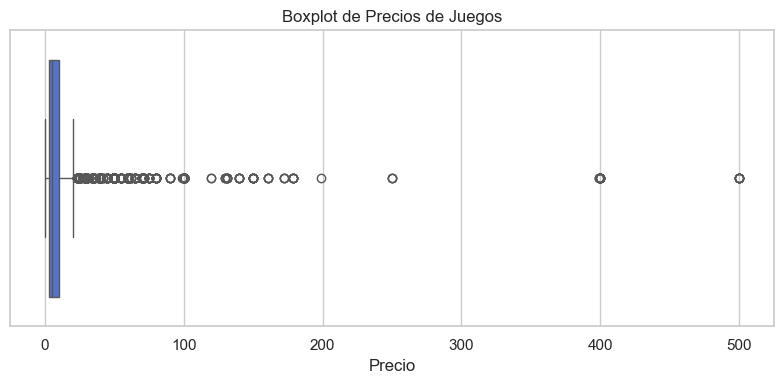

In [90]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Price', data=df_games_genres, color='royalblue')
plt.xlabel('Precio')
plt.title('Boxplot de Precios de Juegos')
plt.tight_layout()
plt.show()


In [91]:
# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = df_games.groupby('Item_Id')['Price'].unique().reset_index().explode('Price')
df_precio_unicos = precio_unicos['Price']

estadisticas = df_precio_unicos.astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {estadisticas[5]}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {estadisticas[6]}')

El precio medio (mediana) de los juegos es de: 4.99
El precio promedio (mean) de los juegos es de: 8.98
El 75% de los juegos tienen un precio menor de: 9.99


Buscando en la web, se encuentra que hay juegos muy costosos que llegan incluso a los 2 mil dolares, sin embargo todos estos salieron luego del año 2019, en la base de datos presentada solo se  tiene informacion de lanzamientos a hasta 2018, por lo que, los juegos con valores de 250 dolares se consideran atípicos, y se reemplazaran por la media.

In [92]:
df_games_genres['Price'] = np.where(df_games_genres['Price'] > 250, 8.98, df_games_genres['Price'])

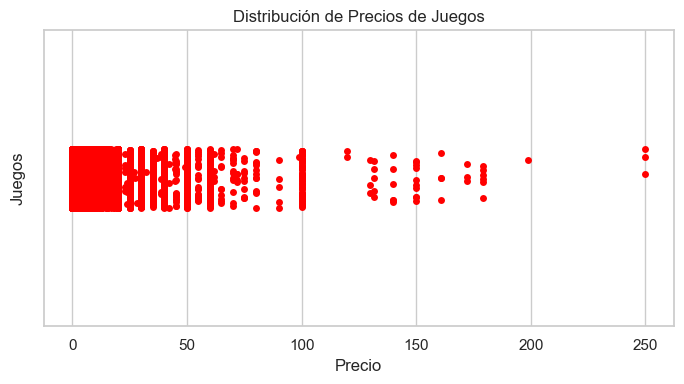

In [93]:
sns.set(style="whitegrid")

#Se crea el strip plot
plt.figure(figsize=(7, 4))
sns.stripplot(x='Price', data=df_games_genres, jitter=True, color='red', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Juegos')
plt.title('Distribución de Precios de Juegos')
plt.tight_layout()

#Se muestra el gráfico
plt.show()

                                                        PLAYTIME_FOREVER

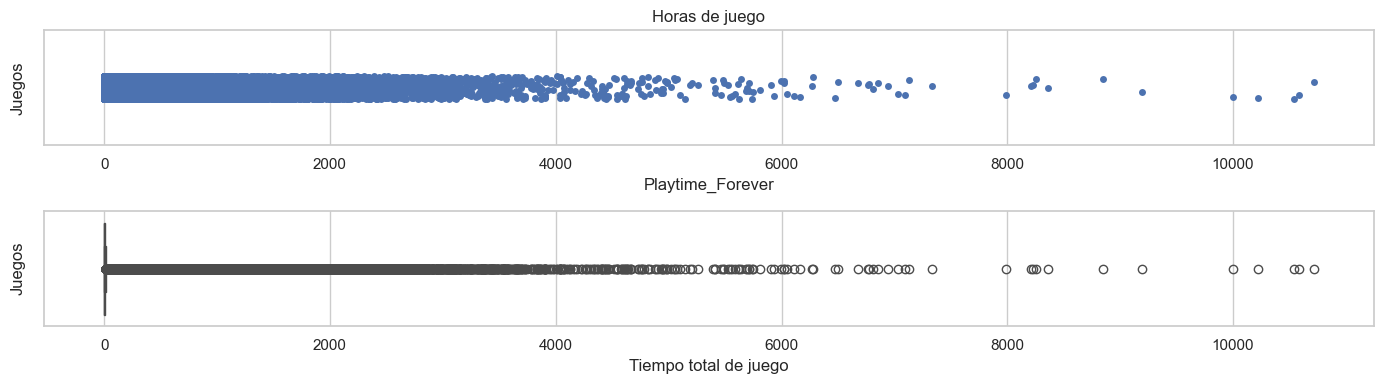

In [94]:
df_items['Playtime_Hours'] = df_items['Playtime_Forever']/60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='Playtime_Hours', ax=ax1)
ax1.set_xlabel('Playtime_Forever') ; ax1.set_ylabel('Juegos') ; ax1.set_title('Horas de juego')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='Playtime_Hours', ax=ax2)
ax2.set_xlabel('Tiempo total de juego') ; ax2.set_ylabel('Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [95]:
estadisticas_hrs = df_items['Playtime_Hours'].describe()
print(f'La cantidad media de horas (mediana) jugadas es de: {round(estadisticas_hrs[5],2)}')
print(f'EL promedio(mean) de horas de de juego es de: {round(estadisticas_hrs[1],2)}')
print(f'El 75% de jugadores, tiene un acumulado de horas de: {round(estadisticas_hrs[6],2)}')

La cantidad media de horas (mediana) jugadas es de: 0.57
EL promedio(mean) de horas de de juego es de: 16.52
El 75% de jugadores, tiene un acumulado de horas de: 5.92


Observamos que la gran mayoria de juegos no tienen un acumulado mayor a 6hrs de juego, sin embargo, vemos tambien valores muy altos, sobrepasando las 8 mil horas,estos podrían considerarse valores atípicos, sin embargo existen algunas posibilidades:
- El jugador es un entusiasta del video juego y le ha dedicado gran parte de su tiempo.
- Uso de bots o de multiples cuentas en el mismo juego, lo que puede generar valores muy altos de horas jugadas en algunos juegos.

Se toma la decicion entonces, de no tener en cuenta aquellos valores que sobrepasen las 8 mil horas :

In [96]:
df_items = df_items[df_items['Playtime_Hours'] <= 8000]


Vamos a observar los 10 juegos con mas horas de juego:

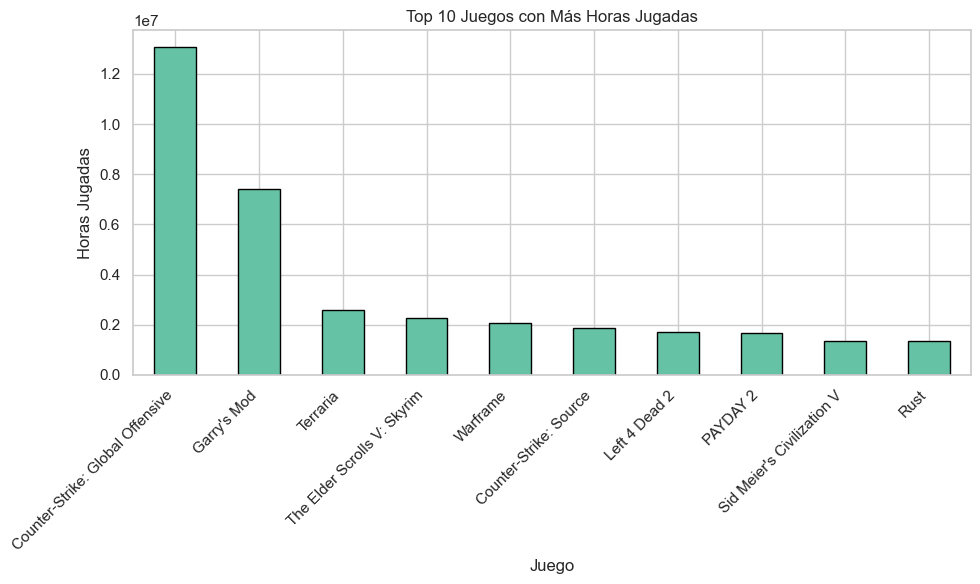

In [97]:

#Sesuma de las horas jugadas por juego
horas_por_juego = df_items.groupby('Item_Name')['Playtime_Hours'].sum()

#Se ordena por horas jugadas de mayor a menor
juegos_mas_jugados = horas_por_juego.sort_values(ascending=False)

#Se obtiene los 10 juegos con más horas jugadas
top_10_juegos_mas_jugados = juegos_mas_jugados.head(10)

#Se crea el gráfico de barras
plt.figure(figsize=(10, 6))
top_10_juegos_mas_jugados.plot(kind='bar', color='#66c2a5', edgecolor='black')
plt.xlabel('Juego')
plt.ylabel('Horas Jugadas')
plt.title('Top 10 Juegos con Más Horas Jugadas')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los juegos para mayor legibilidad
plt.tight_layout()

plt.show()


Y los 10 jugadores con mas horas acumuladas:

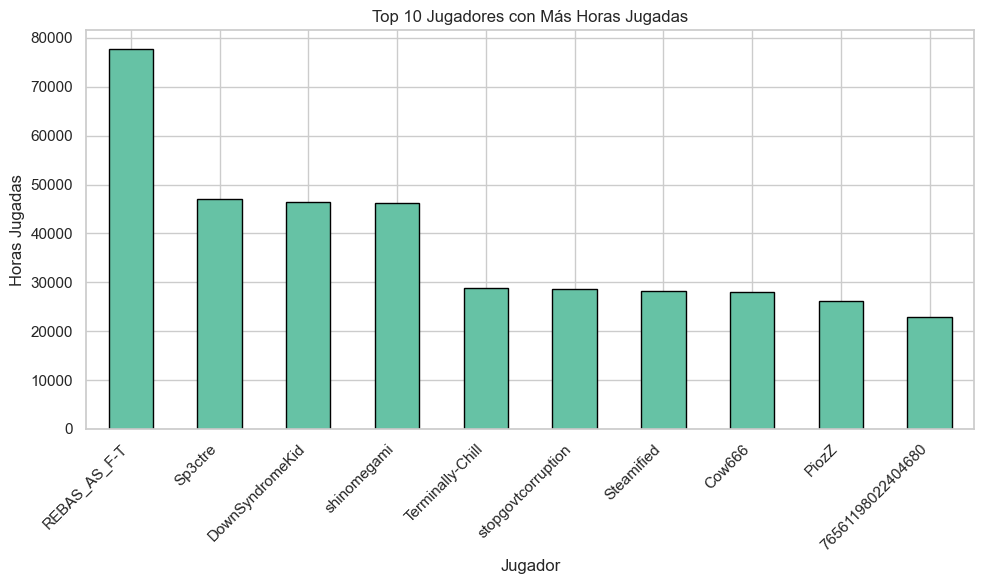

In [99]:
# Calcular la suma de las horas jugadas por jugador
horas_por_jugador = df_items.groupby('User_Id')['Playtime_Hours'].sum()

# Ordenar los jugadores por horas jugadas de mayor a menor
jugadores_mas_hrs = horas_por_jugador.sort_values(ascending=False)

# Obtener los 10 jugadores con más horas jugadas
top_10_jugadores = jugadores_mas_hrs.head(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
top_10_jugadores.plot(kind='bar', color='#66c2a5', edgecolor='black')
plt.xlabel('Jugador')
plt.ylabel('Horas Jugadas')
plt.title('Top 10 Jugadores con Más Horas Jugadas')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres de los jugadores para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

                                                REVIEWS

Teniendo en cuenta el analisis de sentimiento y la columna Recommend, que indica si el usuario recomienda o no el juego, se crea una escala de calificacion, Rating, para poder tener un mejor panorama sobre la calificacion de cada juego.(Similar a, por ejemplo, las estrellas que damos a las apps en Play Store)

In [100]:
#Se crea la cunfion calcula rating, toma sentiment analysis y recommend para, 
# bajo las siguientes condiciones, asignar de 1 a 5 estrellas
def calcula_rating(row):
    if row["Sentiment_Analysis"] == 0 and not row["Recommend"]:
        return 1
    elif row["Sentiment_Analysis"] == 0 and row["Recommend"]:
        return 2
    elif row["Sentiment_Analysis"] == 1 and not row["Recommend"]:
        return 3
    elif row["Sentiment_Analysis"] == 1 and  row["Recommend"]:
        return 3
    elif row["Sentiment_Analysis"] == 2 and not row["Recommend"]:
        return 4
    elif row["Sentiment_Analysis"] == 2 and row["Recommend"]:
        return 5
    else:
        return None

In [101]:
df_reviews['Rating'] = df_reviews.apply(calcula_rating, axis=1)
df_reviews

,User_Id,Item_Id,Recommend,Year_Posted,Sentiment_Analysis,Rating
0,76561197970982479,1250,True,2011,2,5
1,76561197970982479,22200,True,2011,2,5
2,76561197970982479,43110,True,2011,2,5
3,js41637,251610,True,2014,2,5
4,js41637,227300,True,2013,2,5
...,...,...,...,...,...,...
48493,wayfeng,730,True,2015,1,3
48494,76561198251004808,253980,True,2015,2,5
48495,72947282842,730,True,2015,0,2
48496,ApxLGhost,730,True,2015,2,5


In [102]:

tipo_de_Dato_df(df_reviews)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,User_Id,[<class 'str'>],100.0,0.0,0
1,Item_Id,[<class 'int'>],100.0,0.0,0
2,Recommend,[<class 'bool'>],100.0,0.0,0
3,Year_Posted,[<class 'int'>],100.0,0.0,0
4,Sentiment_Analysis,[<class 'int'>],100.0,0.0,0
5,Rating,[<class 'int'>],100.0,0.0,0


In [103]:
df_reviews = df_reviews.rename(columns={'Item_Id': 'Reviews_Item_Id'})

In [104]:
dfrevs = df_reviews[['User_Id','Reviews_Item_Id', 'Rating']]
dfrevs.head(2)

,User_Id,Reviews_Item_Id,Rating
0,76561197970982479,1250,5
1,76561197970982479,22200,5


In [105]:
df_it = df_items[['Item_Id', 'Item_Name']]
# Se borran los dumplicados
df_it = df_it.drop_duplicates()
# Cantidad de juegos
print(f'Hay un total de {len(df_it)} juegos')
df_it.head(2)

Hay un total de 10978 juegos


,Item_Id,Item_Name
0,10,Counter-Strike
1,20,Team Fortress Classic


Una vez renombrada la columna Item id en df reviews y creado el dataframe dfrevs con las columnas necesarias, se hace un merge entre este df y df_it, que contiene el Item Id y el Item Name del df items: 

In [106]:
df_revs_it = dfrevs.merge(df_it, left_on="Reviews_Item_Id", right_on="Item_Id", how='left')
df_revs_it

,User_Id,Reviews_Item_Id,Rating,Item_Id,Item_Name
0,76561197970982479,1250,5,1250.0,Killing Floor
1,76561197970982479,22200,5,22200.0,Zeno Clash
2,76561197970982479,43110,5,43110.0,Metro 2033
3,js41637,251610,5,251610.0,Barbie™ Dreamhouse Party™
4,js41637,227300,5,227300.0,Euro Truck Simulator 2
...,...,...,...,...,...
48493,wayfeng,730,3,730.0,Counter-Strike: Global Offensive
48494,76561198251004808,253980,5,253980.0,Enclave
48495,72947282842,730,2,730.0,Counter-Strike: Global Offensive
48496,ApxLGhost,730,5,730.0,Counter-Strike: Global Offensive


In [107]:
tipo_de_Dato_df(df_revs_it)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,User_Id,[<class 'str'>],100.00,0.00,0
1,Reviews_Item_Id,[<class 'int'>],100.00,0.00,0
2,Rating,[<class 'int'>],100.00,0.00,0
3,Item_Id,[<class 'float'>],88.22,11.78,5714
4,Item_Name,"[<class 'str'>, <class 'float'>]",88.22,11.78,5714


In [108]:
# se revisan los reviews sin nombres de juegos en `df_items`
sin_juegos = df_revs_it[df_revs_it.isnull().any(axis=1)]

sin_juegos

,User_Id,Reviews_Item_Id,Rating,Item_Id,Item_Name
27,76561198089393905,440,3,NaN,NaN
35,DJKamBer,570,5,NaN,NaN
39,DJKamBer,440,5,NaN,NaN
41,Rainbow-Dashie,440,5,NaN,NaN
46,devvonst,440,5,NaN,NaN
...,...,...,...,...,...
48451,BBiiiirr,440,5,NaN,NaN
48464,76561198209894493,440,3,NaN,NaN
48483,01shan,440,5,NaN,NaN
48487,76561198236893796,440,5,NaN,NaN


In [109]:
# Se borran los nulos
df_revs_it = df_revs_it.dropna(subset=['Item_Id'])
# Se cuentan los registros que quedan
print(df_revs_it.shape[0])
# Se verifican los tipo de dato y nulos
tipo_de_Dato_df(df_revs_it)

42784


,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,User_Id,[<class 'str'>],100.0,0.0,0
1,Reviews_Item_Id,[<class 'int'>],100.0,0.0,0
2,Rating,[<class 'int'>],100.0,0.0,0
3,Item_Id,[<class 'float'>],100.0,0.0,0
4,Item_Name,[<class 'str'>],100.0,0.0,0


In [110]:
df_revs_it['Item_Id']=df_revs_it['Item_Id'].astype(int)

Con el proceso anterior, podemos quedarnos solamente con: User ID, Item Name, Rating, de esta manera tenemos las variables mas importantes para nuestro modelo de recomendacion, ya que, podemos conocer al usuario, los juegos que ha jugado, y el rating correspondiente al juego.

In [111]:
df_revs_it = df_revs_it[['User_Id', 'Item_Name', 'Rating']]
df_revs_it.head(3)

,User_Id,Item_Name,Rating
0,76561197970982479,Killing Floor,5
1,76561197970982479,Zeno Clash,5
2,76561197970982479,Metro 2033,5


Observemos como se distribuyen las calificaciones de rating, en contraste con las reviews dadas por los usuarios, y encontraste con todos los juegos

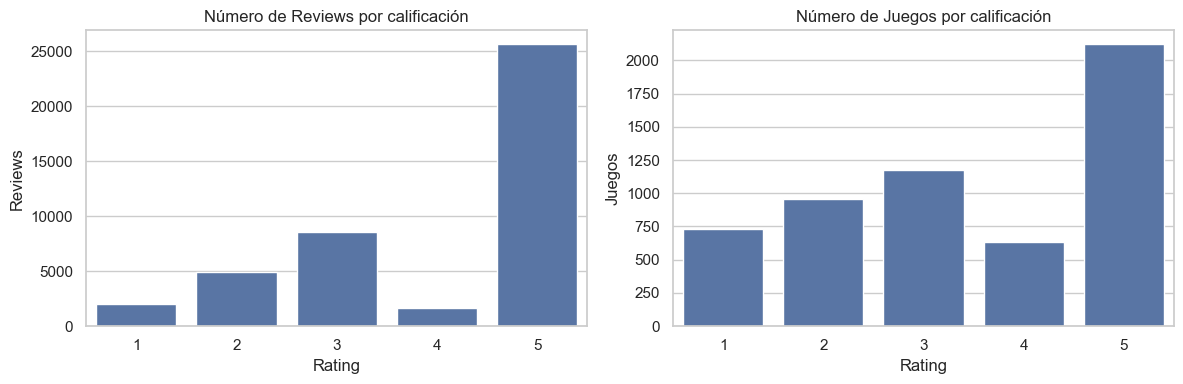

In [112]:
#Se agrupa las calificaciones por rating
ratings_count = df_revs_it['Rating'].value_counts().reset_index()
ratings_count.columns = ['Rating', 'count']
#Se agrupa los juegos únicos por rating
unique_games_per_rating = df_revs_it.groupby('Rating')['Item_Name'].nunique().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=ratings_count, x='Rating', y='count', ax=axes[0])
axes[0].set_title('Número de Reviews por calificación') ; axes[0].set_xlabel('Rating') ; axes[0].set_ylabel('Reviews')

sns.barplot(data=unique_games_per_rating, x='Rating', y='Item_Name', ax=axes[1])
axes[1].set_title('Número de Juegos por calificación') ; axes[1].set_xlabel('Rating') ; axes[1].set_ylabel('Juegos')

plt.tight_layout()
plt.show()

Como podemos ver, la mayoría de reviews son positivas y regulares (5 y 3 como calificacion). De la misma manera y en consecuencia de lo anterior, la mayoria de juegos obtuvieron una calificacion de 3 y 5 por parte de sus usuarios.

In [113]:
#Se cuentan las reseñas por año
reviews_per_year = df_reviews.groupby('Year_Posted').size().reset_index(name='Total_Reviews')

print(reviews_per_year)


   Year_Posted  Total_Reviews
0         2010             66
1         2011            530
2         2012           1201
3         2013           6713
4         2014          21834
5         2015          18154


Un dato adicional e importante a saber, es qué, sólo existen reviews entre los años 2010 a 2015.

Por último se guarda el dataframe df_revs_it, que será util mas adelante.

In [114]:
tipo_de_Dato_df(df_revs_it)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,User_Id,[<class 'str'>],100.0,0.0,0
1,Item_Name,[<class 'str'>],100.0,0.0,0
2,Rating,[<class 'int'>],100.0,0.0,0


In [115]:
df_revs_it.to_csv('../Recomendacion.csv', index=False, encoding='utf-8')


In [116]:
df_revs_it.to_parquet('../Parquets/Recomendacion.gzip', index=False,compression='gzip')